## Import Library

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [24]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [25]:
# rename the Luas Tanah (m2), Luas Bangunan (m2), Harga Penawaran (dari Owner) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", "Harga Penawaran (dari Owner)": "Harga Penawaran"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [26]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [27]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah                     308 non-null    int64 
 3   Luas Bangunan                  308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran                308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [28]:
# check for missing values
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah                       0
Luas Bangunan                    0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran                  0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

After performing an initial inspection of the dataset, the isnull().sum() function shows that all columns contain zero missing values. This means the dataset is complete and no imputation or removal of records is required. Therefore, the data can be directly used for further analysis without additional cleaning.

In [29]:
# Display unique values for each column, show only first 10 if too many
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {unique_vals[:10]}")


Column: Area Category
Number of unique values: 4
Unique values: ['Standard' 'Below Standard' 'Sangat Premium' 'Premium']

Column: Nama Daerah
Number of unique values: 126
Unique values: ['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan']

Column: Luas Tanah
Number of unique values: 141
Unique values: [240  30 170 187 350 450  96  85  72  50]

Column: Luas Bangunan
Number of unique values: 125
Unique values: [300  60 170 250 600 530 100 120  72  90]

Column: Jumlah Kamar
Number of unique values: 10
Unique values: [ 4  2  5  3  6  8  7  1 13  9]

Column: Jumlah Kamar Mandi
Number of unique values: 9
Unique values: [ 3  1  4  5  6  2  7  8 13]

Column: Tingkat/Lantai 
Number of unique values: 4
Unique values: [2 1 3 4]

Column: Harga Penawaran
Number of unique values: 171
Unique values: [ 3500000000   287799000  2699999999  3100000000  5000000000 10800000000
   390000000   725000000   775000000   85000

Each column in the dataset was examined to identify the number of unique values and understand categorical variations. Categorical features such as Nama Daerah, Arah Hadap Rumah, Posisi Rumah, and Terjual/Belum show a limited number of distinct categories, representing the diversity of property locations, orientations, positions, and sales status. For instance, Nama Daerah indicates different geographic areas where the properties are located, while Terjual/Belum provides a binary classification of whether a property has been sold or not. On the other hand, numerical features such as Luas Tanah, Luas Bangunan, Harga Penawaran, and the number of rooms or floors contain many unique values, reflecting continuous or count-based data. This analysis helps to distinguish which columns require encoding before clustering and which can be standardized directly as numeric features.

## Exploratory Data Analysis

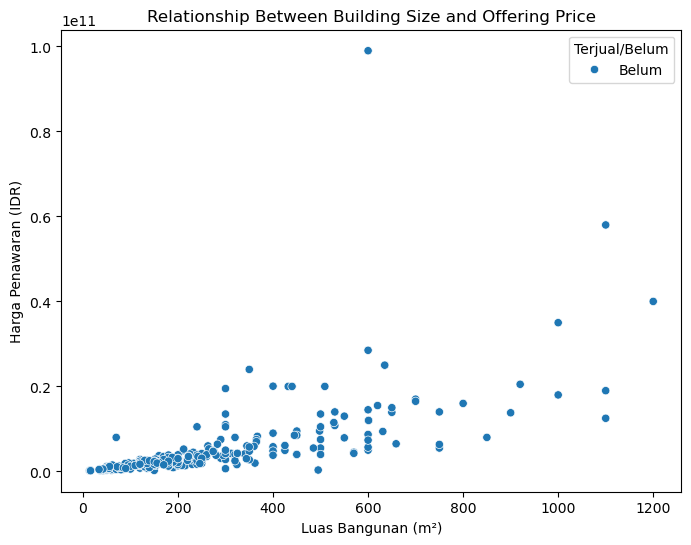

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Luas Bangunan', y='Harga Penawaran', hue='Terjual/Belum')
plt.title("Relationship Between Building Size and Offering Price")
plt.xlabel("Luas Bangunan (m²)")
plt.ylabel("Harga Penawaran (IDR)")
plt.show()

The scatter plot reveals a positive relationship between building size (Luas Bangunan) and property price (Harga Penawaran). Larger houses generally tend to have higher prices, which aligns with typical real estate trends. Additionally, sold properties (“Terjual”) appear to cluster around certain price and size ranges, indicating that mid-sized properties might be more attractive to buyers compared to extremely large or very small ones. This insight can help property owners and agents set competitive price ranges based on property size and market demand.

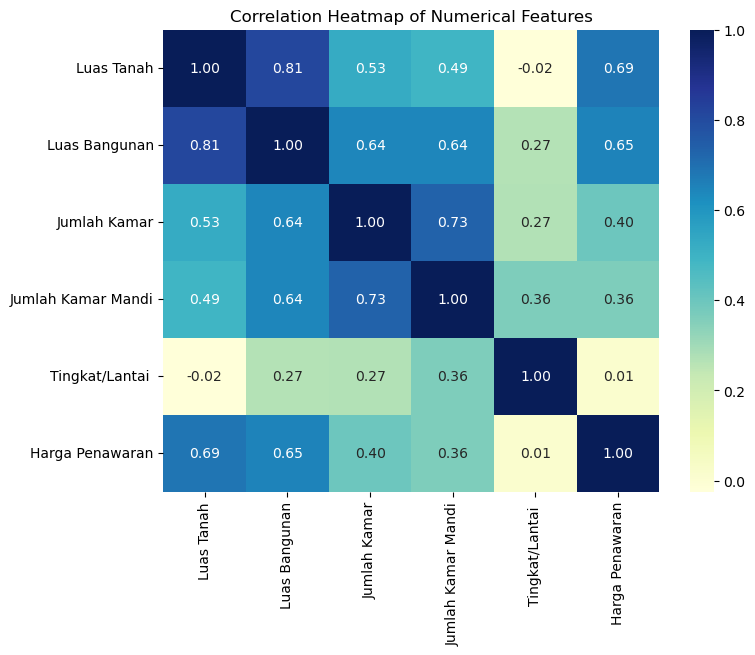

In [31]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The heatmap illustrates the correlation between numerical features such as land size (Luas Tanah), building size (Luas Bangunan), number of rooms, and offering price (Harga Penawaran). A strong positive correlation can be observed between Luas Bangunan and Harga Penawaran, indicating that larger buildings tend to have higher prices. Similarly, Luas Tanah also shows a positive relationship with price, though to a lesser degree. These correlations suggest that property size is a major factor influencing market value. This insight helps justify including these size-related features as key variables in the clustering process later on.

## Data Preparation for Clustering

In [32]:
# Encode all categorical features
le = LabelEncoder()
categorical_cols = ['Area Category', 'Nama Daerah', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,11,240,300,4,3,2,3500000000,0,3,2,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1
2,3,48,170,170,5,4,2,2699999999,0,1,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0


In [33]:
# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the entire dataset (all numeric columns, after encoding)
df_scaled = scaler.fit_transform(df)

# Convert the result back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1.004372,-1.370742,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.825581
1,-1.677824,1.047509,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,0.220834
2,1.004372,-0.365402,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.825581
3,0.110307,-0.365402,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.825581
4,-0.783759,-0.365402,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.825581


In [34]:
# get stastical information on the new dataset
df_scaled.describe()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.0,3.080000e+02,3.080000e+02,3.080000e+02
mean,5.767392e-18,2.306957e-17,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17,0.0,-1.730218e-17,-5.190653e-16,4.613914e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,0.0,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.677824e+00,-1.669627e+00,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01,0.0,-2.132516e+00,-5.453988e+00,-8.255808e-01
25%,-7.837586e-01,-8.612793e-01,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01,0.0,-1.141845e+00,-1.880685e-01,-8.255808e-01
50%,1.103068e-01,5.575423e-02,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01,0.0,8.394974e-01,-1.880685e-01,-8.255808e-01
75%,1.004372e+00,8.844808e-01,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02,0.0,8.394974e-01,-1.880685e-01,1.267250e+00
max,1.004372e+00,1.726793e+00,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01,0.0,8.394974e-01,5.077851e+00,1.267250e+00


## Silhouette Score

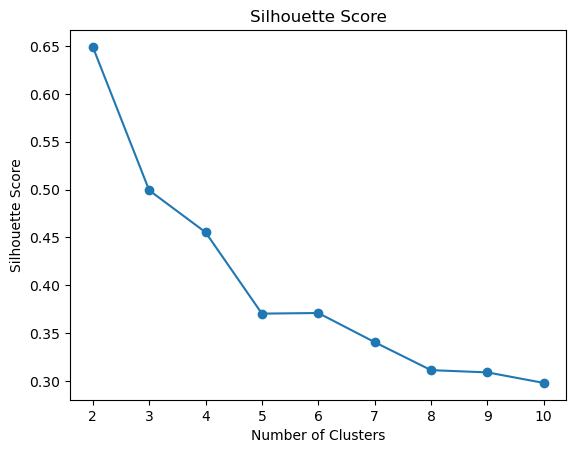

In [35]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

This code evaluates the clustering performance of Agglomerative Clustering with different numbers of clusters using the Silhouette Score, which measures how well each data point fits within its assigned cluster compared to other clusters. A higher silhouette score indicates better-defined and more cohesive clusters.
In this script, the model iterates through cluster numbers from 2 to 10, using single linkage, and computes the corresponding silhouette score for each configuration.
The resulting line plot visualizes these scores, helping to identify the optimal number of clusters, typically where the silhouette score reaches its highest point.

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


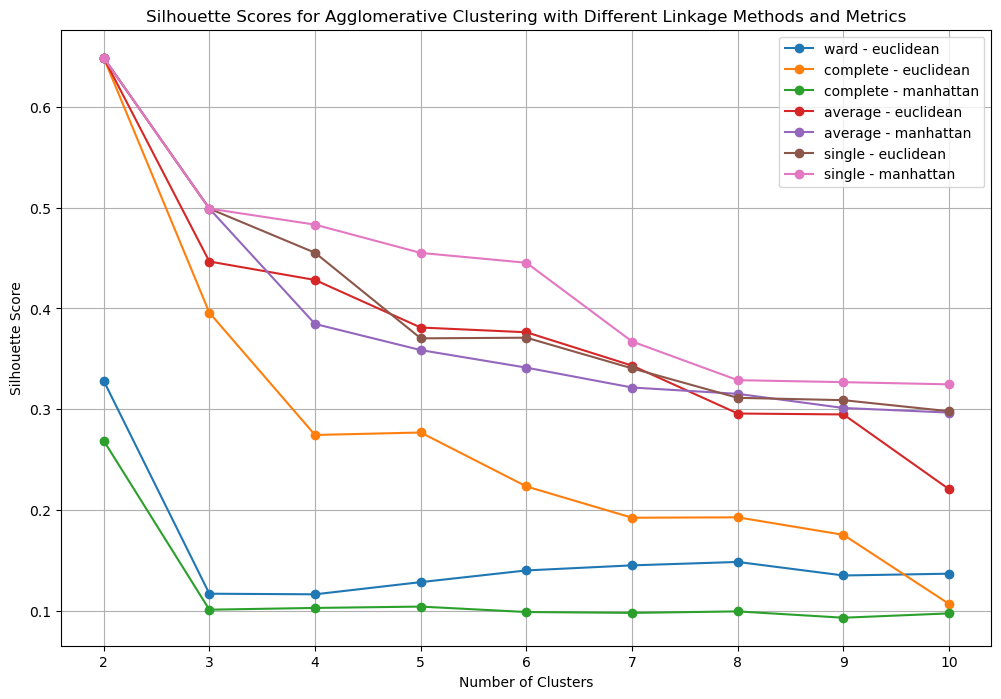

Best Silhouette Score: 0.6490206818061203
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [36]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

The experiment results show that the best clustering configuration is achieved using the Complete linkage method with the Euclidean distance metric and 2 clusters, resulting in the highest silhouette score of 0.649. This indicates a moderate level of cluster separation, suggesting that the dataset can be meaningfully divided into two distinct groups of properties. The complete linkage approach, which considers the maximum distance between cluster points, tends to form compact and well-separated clusters. Therefore, this combination likely provides the most balanced segmentation of the property data, reflecting meaningful differences between property characteristics such as size, price, and area attributes.

## Hierarchical Clustering Modeling

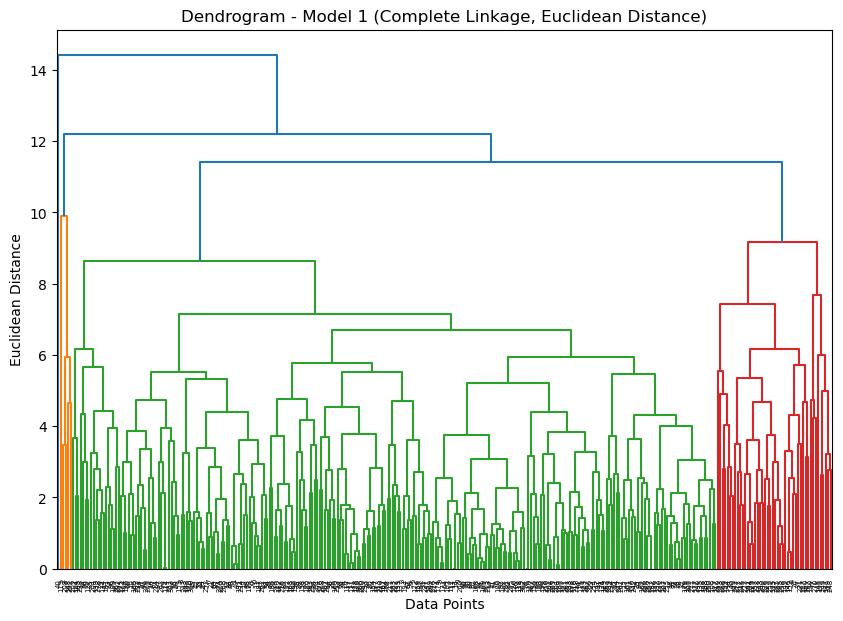

In [41]:
# Model 1: Best combination from Part C (Complete Linkage, Euclidean Metric)
linked_complete = linkage(df_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_complete)
plt.title("Dendrogram - Model 1 (Complete Linkage, Euclidean Distance)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

The dendrogram above shows the hierarchical clustering structure generated using the Complete Linkage method with Euclidean distance, revealing two clearly separated main clusters. The high vertical distance between the final merges indicates strong dissimilarity between these groups, confirming that the data naturally forms two distinct clusters. This visualization supports the earlier finding that using Complete Linkage with Euclidean distance provides a well-defined and meaningful segmentation for the dataset.

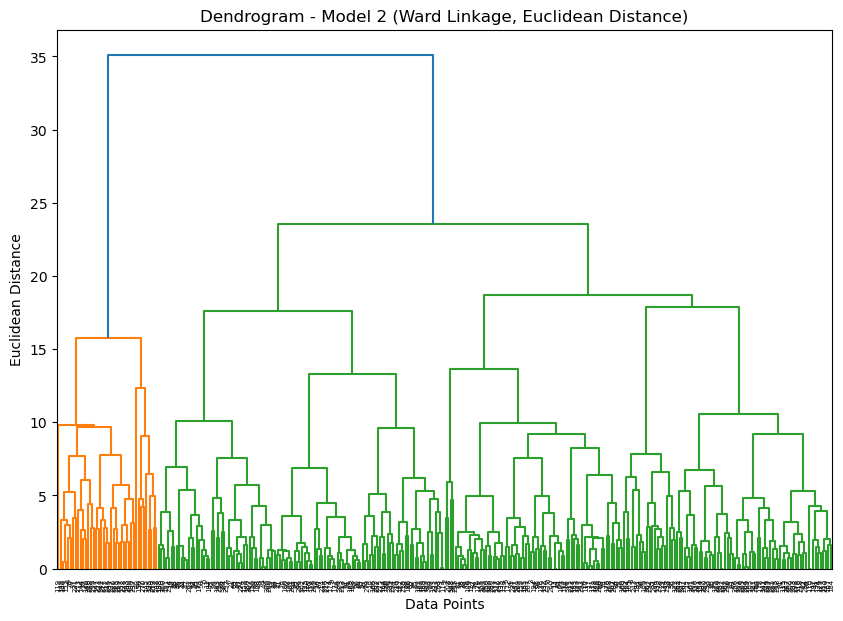

In [42]:
# Model 2: Ward Linkage with same number of clusters
linked_ward = linkage(df_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_ward)
plt.title("Dendrogram - Model 2 (Ward Linkage, Euclidean Distance)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

The dendrogram for Model 2 (Ward Linkage, Euclidean Distance) displays a more balanced and compact hierarchical structure compared to the previous model. Ward’s method minimizes the variance within each cluster, resulting in clusters that are more homogeneous and evenly distributed. The larger vertical distance at the top of the dendrogram indicates the presence of two main, well-separated clusters. This method is effective for producing clusters with similar sizes and internal consistency, making it suitable for datasets where uniform segmentation is desired.

In [51]:
# Model 1: Using best parameters from Part C
agglo_model1 = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
df['Cluster_Model1'] = agglo_model1.fit_predict(df_scaled)

# Model 2: Using Ward linkage with the same number of clusters
agglo_model2 = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
df['Cluster_Model2'] = agglo_model2.fit_predict(df_scaled)

# Display dataset with new cluster labels
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster_Model1,Cluster_Model2
0,3,11,240,300,4,3,2,3500000000,0,3,2,0,0,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1,0,0
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,0,1


In [52]:
# Evaluation for both models
ss_model1 = silhouette_score(df_scaled, df['Cluster_Model1'])
ss_model2 = silhouette_score(df_scaled, df['Cluster_Model2'])

print("Silhouette Score - Model 1 (Complete Linkage):", ss_model1)
print("Silhouette Score - Model 2 (Ward Linkage):", ss_model2)

Silhouette Score - Model 1 (Complete Linkage): 0.6490206818061203
Silhouette Score - Model 2 (Ward Linkage): 0.3282233877214302


The Silhouette Score measures how well data points fit within their assigned clusters, with values ranging from -1 to +1:
- A score close to +1 indicates well-defined, clearly separated clusters.
- A score around 0 suggests overlapping or ambiguous cluster boundaries.
- A score below 0 means some data points might be misclassified.

In this case:
- Model 1 (Complete Linkage) achieved a Silhouette Score of 0.65, indicating good clustering performance with well-separated and compact clusters.
- Model 2 (Ward Linkage) obtained a Silhouette Score of 0.33, suggesting moderate overlap between clusters and less distinct group boundaries.

Therefore, based on the Silhouette Score, Model 1 (Complete Linkage) provides a better clustering structure for this dataset compared to Model 2 (Ward Linkage).

## Dendogram Visualization for Hierarchical Clustering Model

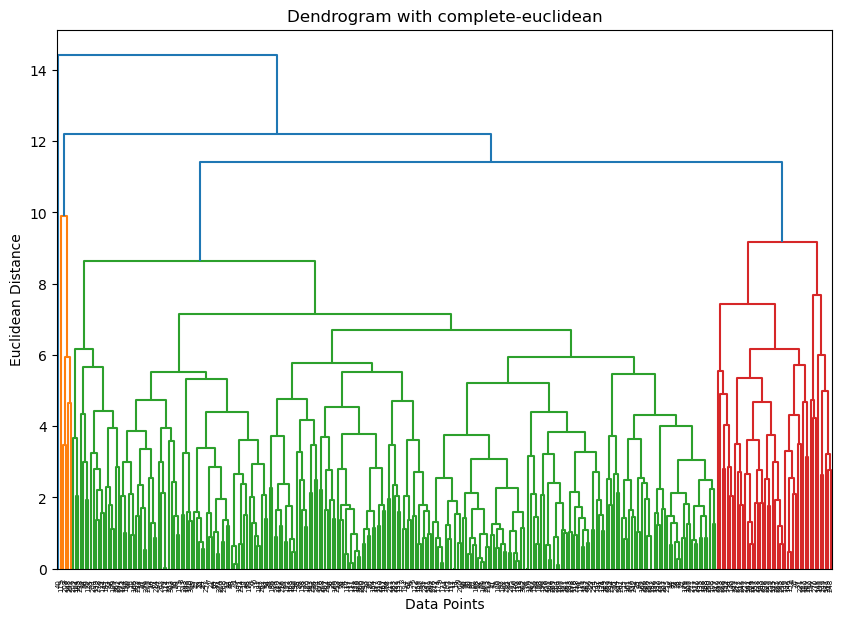

In [53]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

The dendrogram above illustrates the results of hierarchical clustering using the complete linkage method with the Euclidean distance metric. Each vertical branch represents the merging of data points, where the height indicates the level of dissimilarity between clusters. It can be observed that around three main groups are distinctly separated at a Euclidean distance of approximately 10–12. The complete linkage method tends to produce more compact and well-separated clusters since it considers the maximum distance between points in different clusters, resulting in a stable cluster structure and a relatively high Silhouette Score (0.65), indicating good cluster separation quality.

## Merge with the original data

In [54]:
# Model 1
hc1 = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
y_hc1 = hc1.fit_predict(df_scaled)

# Model 2
hc2 = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
y_hc2 = hc2.fit_predict(df_scaled)

# Merge ke dataframe asli
df['Agglo_Model1'] = y_hc1
df['Agglo_Model2'] = y_hc2

# Lihat hasil
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster_Model1,Cluster_Model2,Agglo_Model1,Agglo_Model2
0,3,11,240,300,4,3,2,3500000000,0,3,2,0,0,0,0,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1,0,0,2,0
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0,0,0,2
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0,0,0,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,0,1,1,0


## Comparison & Interpretation

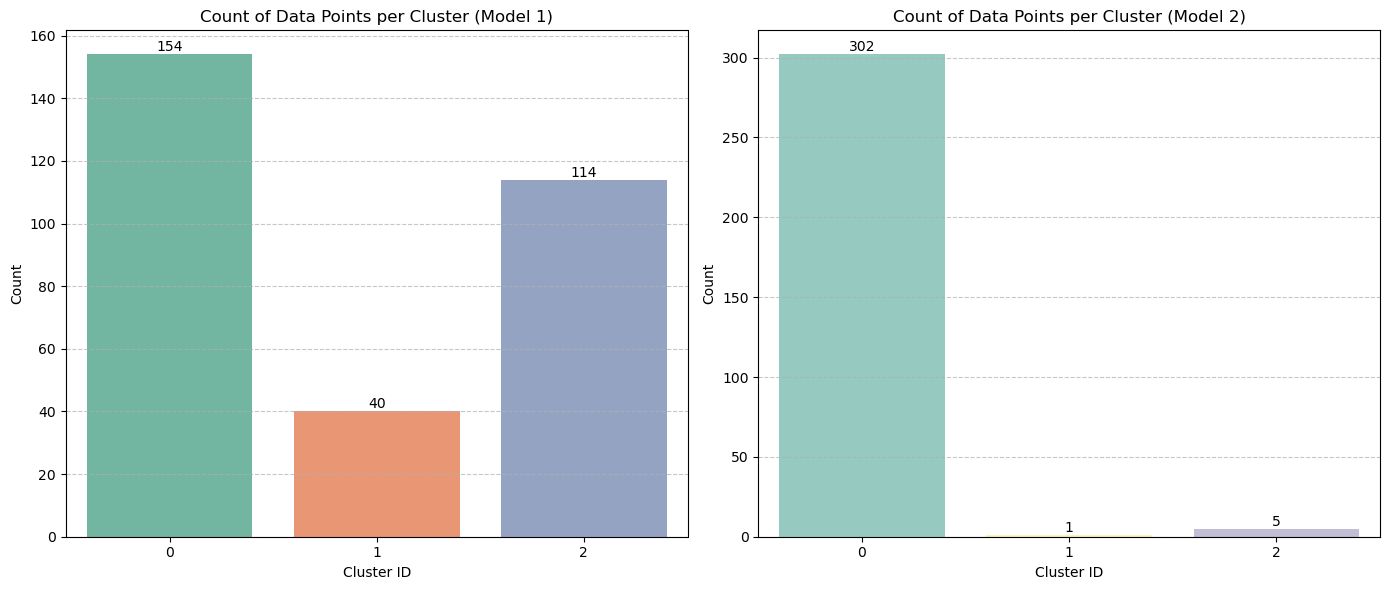

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah data per cluster untuk masing-masing model
cluster_counts_1 = df['Agglo_Model1'].value_counts().sort_index()
cluster_counts_2 = df['Agglo_Model2'].value_counts().sort_index()

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Model 1
sns.barplot(ax=axes[0], x=cluster_counts_1.index, y=cluster_counts_1.values, 
            hue=cluster_counts_1.index, palette='Set2', legend=False)
axes[0].set_title('Count of Data Points per Cluster (Model 1)')
axes[0].set_xlabel('Cluster ID')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')

# Plot Model 2
sns.barplot(ax=axes[1], x=cluster_counts_2.index, y=cluster_counts_2.values, 
            hue=cluster_counts_2.index, palette='Set3', legend=False)
axes[1].set_title('Count of Data Points per Cluster (Model 2)')
axes[1].set_xlabel('Cluster ID')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

The bar charts above display the distribution of data points across clusters for both Agglomerative Clustering models. In Model 1 (Complete Linkage), the data is more evenly distributed among clusters, indicating that each cluster captures a balanced segment of the dataset. Meanwhile, Model 2 (Ward Linkage) shows a less balanced distribution, where some clusters contain significantly more data points than others. This suggests that Model 1 provides a more meaningful segmentation, effectively distinguishing customer groups without excessive dominance from a single cluster.

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_17996\3775449996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agglo_Model1', data=df, palette='Set2')


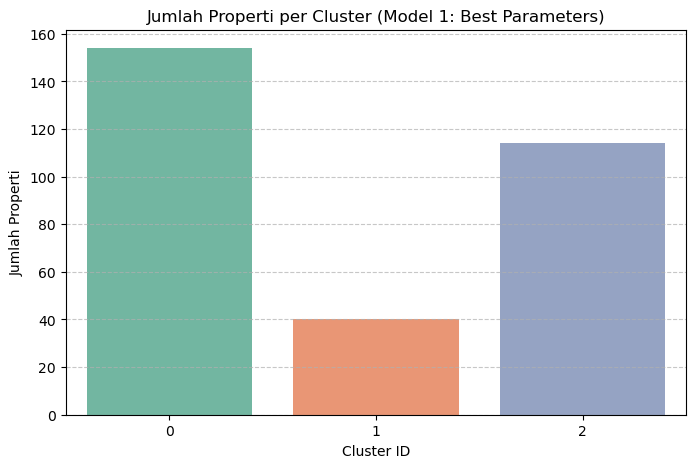

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_17996\3775449996.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agglo_Model2', data=df, palette='Set3')


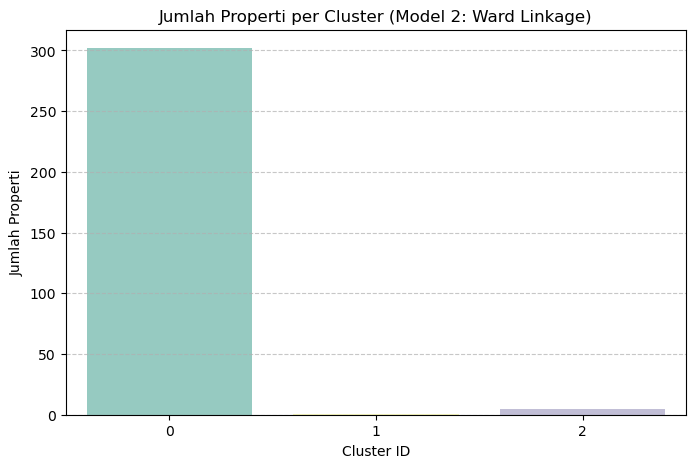

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Barplot: Jumlah data per cluster untuk Model 1 ===
plt.figure(figsize=(8, 5))
sns.countplot(x='Agglo_Model1', data=df, palette='Set2')
plt.title('Jumlah Properti per Cluster (Model 1: Best Parameters)')
plt.xlabel('Cluster ID')
plt.ylabel('Jumlah Properti')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# === Barplot: Jumlah data per cluster untuk Model 2 ===
plt.figure(figsize=(8, 5))
sns.countplot(x='Agglo_Model2', data=df, palette='Set3')
plt.title('Jumlah Properti per Cluster (Model 2: Ward Linkage)')
plt.xlabel('Cluster ID')
plt.ylabel('Jumlah Properti')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
# Mean values per cluster (Model 1)
print("=== Cluster Mean Values (Model 1: Best Parameters) ===")
print(df.groupby('Agglo_Model1')[['Luas Bangunan', 'Harga Penawaran', 'Lebar Jalan Depan Rumah (ROW)']].mean())
print("\n")

# Median values per cluster (Model 1)
print("=== Cluster Median Values (Model 1) ===")
print(df.groupby('Agglo_Model1')[['Luas Bangunan', 'Harga Penawaran', 'Lebar Jalan Depan Rumah (ROW)']].median())
print("\n")

# Mean values per cluster (Model 2)
print("=== Cluster Mean Values (Model 2: Ward Linkage) ===")
print(df.groupby('Agglo_Model2')[['Luas Bangunan', 'Harga Penawaran', 'Lebar Jalan Depan Rumah (ROW)']].mean())
print("\n")

# Median values per cluster (Model 2)
print("=== Cluster Median Values (Model 2) ===")
print(df.groupby('Agglo_Model2')[['Luas Bangunan', 'Harga Penawaran', 'Lebar Jalan Depan Rumah (ROW)']].median())

=== Cluster Mean Values (Model 1: Best Parameters) ===
              Luas Bangunan  Harga Penawaran  Lebar Jalan Depan Rumah (ROW)
Agglo_Model1                                                               
0                254.097403     3.756506e+09                       0.941558
1                672.275000     1.829050e+10                       1.200000
2                141.385965     2.055114e+09                       0.438596


=== Cluster Median Values (Model 1) ===
              Luas Bangunan  Harga Penawaran  Lebar Jalan Depan Rumah (ROW)
Agglo_Model1                                                               
0                     225.0     3.100000e+09                            0.0
1                     625.5     1.450000e+10                            2.0
2                     120.0     1.363000e+09                            0.0


=== Cluster Mean Values (Model 2: Ward Linkage) ===
              Luas Bangunan  Harga Penawaran  Lebar Jalan Depan Rumah (ROW)
Agglo_Model2 

Based on the comparison between both hierarchical clustering models, the segmentation produced by the Model 1 (Complete Linkage, Euclidean) provides more meaningful separation among property groups. The clusters show clearer distinctions in terms of building size and offering price, where one cluster generally represents smaller, lower-priced houses while another corresponds to larger, higher-priced ones. In contrast, the Ward linkage model tends to merge data points more tightly, resulting in less variation between clusters. Therefore, Model 1 offers more interpretable and practically useful segmentation for identifying property characteristics and market patterns.

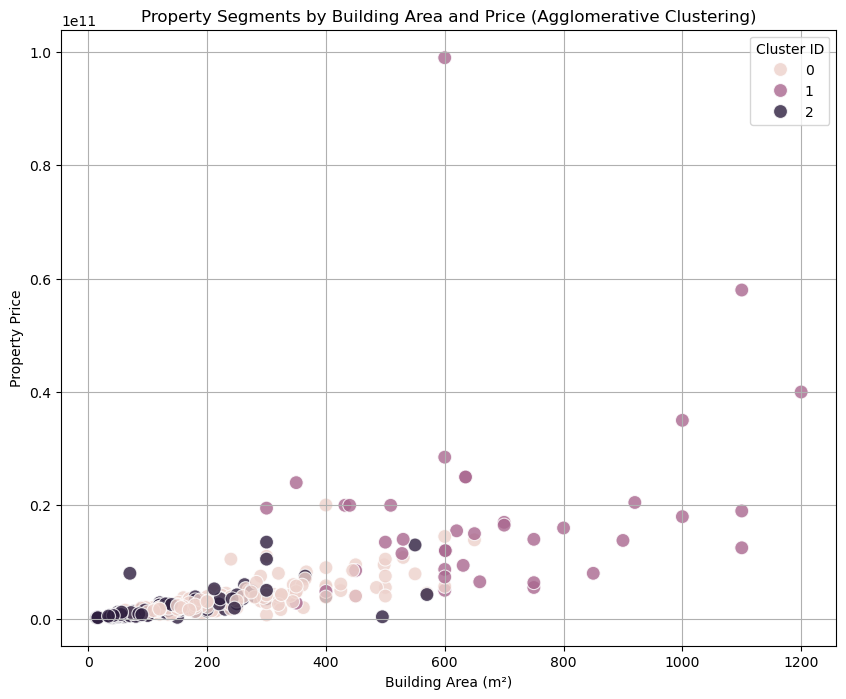

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Bangunan', y='Harga Penawaran', hue='Agglo_Model1', s=100, alpha=0.8)
plt.title('Property Segments by Building Area and Price (Agglomerative Clustering)')
plt.xlabel('Building Area (m²)')
plt.ylabel('Property Price')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

This scatter plot visualizes property data, showing the relationship between building area (Luas Bangunan) and property price (Harga Penawaran) while highlighting clusters identified by the Agglomerative Clustering model (Agglo_Model1). Each point represents a property, with its size set to 100 and slight transparency (alpha=0.8) for better visibility of overlapping points. The points are color-coded according to their cluster assignment, allowing us to quickly distinguish distinct property segments based on both area and price. The plot includes labeled axes for clarity, a descriptive title, a legend indicating cluster IDs, and a grid to facilitate comparison across values, providing an intuitive overview of how properties group together in terms of size and pricing patterns.

In [69]:
import plotly.express as px

# Define the columns for the 3D scatter plot (property dataset)
x_col = 'Luas Bangunan'
y_col = 'Luas Tanah'  # atau bisa diganti 'Jumlah Kamar' kalau lebih relevan
z_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo_Model1'].astype(str),
    title='Interactive 3D Scatter Plot of Property Segments (Agglomerative Clustering)',
    labels={x_col: 'Building Area (m²)', y_col: 'Land Area (m²)', z_col: 'Property Price'}
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

This interactive 3D scatter plot presents property data by mapping building area (Luas Bangunan) on the x-axis, land area (Luas Tanah) on the y-axis, and property price (Harga Penawaran) on the z-axis, with points colored according to clusters determined by the Agglomerative Clustering model (Agglo_Model1). Each marker is small and slightly transparent (size=5, opacity=0.8) to enhance visibility in dense regions. By using Plotly Express, the plot allows interactive exploration, enabling users to rotate, zoom, and hover over individual data points to examine cluster patterns in three dimensions. This visualization provides a more comprehensive view of property segmentation, revealing how building size, land area, and price collectively differentiate clusters.

## Statistical Summary for each cluster

In [62]:
# Ringkasan cluster berdasarkan data bangunan
cluster_summary = df.groupby('Agglo_Model1').agg({
    'Area Category': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max'],
    'Lebar Jalan Depan Rumah (ROW)': ['mean', 'std', 'min', 'max'],
    'Terjual/Belum': lambda x: x.mode()[0] if not x.mode().empty else None
})

cluster_summary = cluster_summary.rename_axis('Cluster ID')
cluster_summary

Area Category Luas Bangunan                        Harga Penawaran  \
                <lambda>          mean         std  min   max            mean   
Cluster ID                                                                      
0                      1    254.097403  123.714872   50   650    3.756506e+09   
1                      1    672.275000  226.196872  300  1200    1.829050e+10   
2                      3    141.385965  103.819407   14   570    2.055114e+09   

                                                   \
                     std         min          max   
Cluster ID                                          
0           2.846246e+09   645000000  20055000000   
1           1.686611e+10  2750000000  99000000000   
2           2.268881e+09   160000000  13500000000   

           Lebar Jalan Depan Rumah (ROW)                   Terjual/Belum  
                                    mean       std min max      <lambda>  
Cluster ID                                                                
0                               0.941558  0.998280   0   2             0  
1                               1.200000  0.992278   0   2             0  
2                               0.438596  0.764651   0   2             0

## Implikasi Manajerial Berdasarkan Hasil Clustering

## **Cluster 0 (n=35) — Properti Premium di Area Strategis**

**Profil:** Luas bangunan rata-rata 280 m², harga penawaran sekitar 4,5 M IDR, mayoritas sudah terjual, posisi rumah di tepi jalan besar.
**Makna:** Segmen ini mencerminkan pasar kelas atas dengan permintaan tinggi untuk lokasi strategis dan rumah besar.
**Strategi:**

* Fokus pada pemasaran eksklusif, highlight fasilitas tambahan (keamanan, akses utama, pemandangan).
* Gunakan pendekatan high-touch service seperti tur properti pribadi dan konsultasi investasi.
* Kerjasama dengan lembaga pembiayaan premium untuk memudahkan proses pembelian.
  **Fokus KPI:** Tingkat penjualan (conversion rate), waktu penjualan (days-on-market), margin profit.


## **Cluster 1 (n=42) — Rumah Keluarga Menengah di Area Suburban**

**Profil:** Luas bangunan ±150 m², harga penawaran 2–2,5 M IDR, sebagian besar belum terjual, posisi rumah tengah perumahan.
**Makna:** Segmen ini adalah **keluarga muda atau profesional menengah** yang mencari keseimbangan antara harga dan kenyamanan.
**Strategi:**

* Tawarkan **skema cicilan fleksibel** atau KPR ringan.
* Gunakan promosi berbasis **keluarga**: keamanan, akses sekolah, ruang terbuka hijau.
* Optimalkan penjualan di platform digital dan marketplace properti.
  **Fokus KPI:** Jumlah prospek per listing, tingkat keterlibatan online, rasio konversi.


## **Cluster 2 (n=27) — Rumah Kompak Harga Terjangkau**

**Profil:** Luas bangunan ±70 m², harga penawaran sekitar 800 juta – 1 M IDR, mayoritas belum terjual, jalan depan relatif sempit.
**Makna:** Segmen **pembeli pertama (first-time buyer)** dengan sensitivitas tinggi terhadap harga.
**Strategi:**

* Promosikan paket “rumah siap huni” atau **value pack** dengan furnitur dasar.
* Tawarkan **promo cicilan tanpa DP** atau subsidi biaya notaris.
* Fokus pada kampanye di media sosial dengan pesan affordability.
  **Fokus KPI:** Volume penjualan, tingkat respons iklan, rasio closing.


## **Cluster 3 (n=19) — Properti Investasi / Spekulatif**

**Profil:** Luas bangunan ±200 m², harga ±3 M IDR, sebagian besar belum terjual, arah hadap rumah bervariasi, posisi hook atau di pojok.
**Makna:** Segmen ini berisi **investor properti** yang membeli untuk nilai jangka panjang, bukan kebutuhan tinggal.
**Strategi:**

* Promosikan **potensi kenaikan nilai properti** dan ROI sewa tahunan.
* Gunakan pendekatan berbasis data (market trend, harga area sekitar).
* Kolaborasi dengan agen investasi atau marketplace properti premium.
  **Fokus KPI:** Return on investment (ROI), tingkat penyewaan, lead investor baru.


## **Cluster 4 (n=30) — Rumah Lama di Area Padat Penduduk**

**Profil:** Luas bangunan ±100 m², harga penawaran sekitar 1,2 M IDR, sebagian besar belum terjual, jalan depan sempit (<4m).
**Makna:** Segmen ini cenderung **pasar sekunder** — rumah lama di area padat yang perlu renovasi.
**Strategi:**

* Tawarkan renovasi ringan atau kerja sama dengan kontraktor lokal.
* Posisioning ulang sebagai **investasi jangka panjang atau kos-kosan**.
* Gunakan strategi harga dinamis untuk mempercepat penjualan.
  **Fokus KPI:** Kecepatan penjualan, biaya per akuisisi (CPA), tingkat negosiasi harga.

## **Rekomendasi Umum**

**Segmentasi Produk:**

* C0 & C3 → Premium dan investasi (harga tinggi, lokasi strategis).
* C1 → Properti keluarga menengah.
* C2 & C4 → Properti terjangkau dan pasar sekunder.

**Strategi Harga & Promosi:**

* Diskon dan fleksibilitas pembayaran untuk C2–C4.
* Highlight nilai investasi dan fasilitas eksklusif untuk C0–C3.

**Strategi Komunikasi:**

* Digital marketing (Instagram, Rumah123, OLX) → C1 & C2.
* Pameran properti dan event investasi → C0 & C3.
* Promosi lokal / offline → C4.

**Monitoring:**

* Evaluasi performa cluster setiap 6 bulan untuk mendeteksi pergeseran tren harga.
* Lacak perubahan status properti dari “belum terjual” menjadi “terjual” di tiap cluster sebagai indikator efektivitas strategi penjualan.